In [102]:
import os
import csv
import pandas as pd 
import matplotlib.pyplot as plt


file = "checkouts_5yr.csv"

publisher_df = pd.read_csv(file)

#publishers["MaterialType"].value_counts()

In [103]:
# Standardizing the data

publisher_std = publisher_df.replace({"Random House,": "Random House, Inc."})
publisher_count = publisher_std["Publisher"].value_counts()


publisher_count.head(10)


Random House, Inc.               378375
Penguin Group (USA), Inc.        270692
HarperCollins Publishers Inc.    237505
Books on Tape                    147939
Blackstone Audio, Inc.           137253
Macmillan Publishers             124034
Simon & Schuster, Inc.           105002
Hachette Digital, Inc.            95845
Tantor Media, Inc                 48401
Thorndike Press,                  41173
Name: Publisher, dtype: int64

In [104]:
# Sum checkouts by publisher

publisher_d2 = publisher_std.groupby(['Publisher'])
funcs = {'Checkouts':'sum'}
publisher_d2 = publisher_d2.agg(funcs)





In [105]:
# List of top 10 publisher by checkouts

short_publisher = publisher_d2.sort_values("Checkouts",ascending = False)
short_publisher

Top_10 = short_publisher.head(10)
Top_10

,Checkouts
Publisher,
"Random House, Inc.",1557597
"Penguin Group (USA), Inc.",739810
HarperCollins Publishers Inc.,717631
Books on Tape,606737
"Blackstone Audio, Inc.",398396
"Hachette Digital, Inc.",360612
Macmillan Publishers,348317
"Simon & Schuster, Inc.",297136
"Alfred A. Knopf,",180564


                               Checkouts
Publisher                               
Random House, Inc.               1557597
Penguin Group (USA), Inc.         739810
HarperCollins Publishers Inc.     717631
Books on Tape                     606737
Blackstone Audio, Inc.            398396
Hachette Digital, Inc.            360612
Macmillan Publishers              348317
Simon & Schuster, Inc.            297136
Alfred A. Knopf,                  180564
Candlewick Press,                 174411


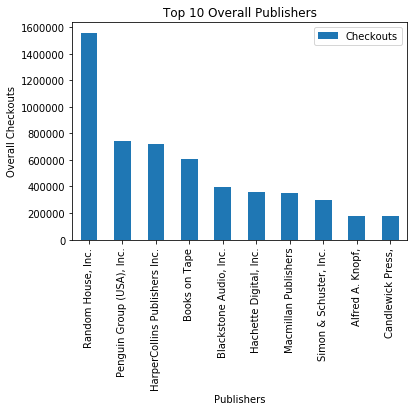

In [106]:
# Making a bar graph

final_chart = Top_10.head(10)


final_chart.plot(kind='bar', title='Top 10 Overall Publishers')

plt.xlabel('Publishers')
plt.ylabel('Overall Checkouts')

print(final_chart)